# Rent Prediction

### Bibliothèques

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import linear_model, metrics
from mpl_toolkits.mplot3d import Axes3D

## Modèle avec 1 feature (surface)

### Data Exploration

In [209]:
data = pd.read_csv('house.csv')

data.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [210]:
data.shape

(545, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   loyer    545 non-null    int64
 1   surface  545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


In [10]:
data.describe()

,loyer,surface
count,545.000000,545.000000
mean,2307.502752,63.236697
std,2201.364353,48.716475
min,488.000000,11.000000
25%,1255.000000,32.000000
50%,1795.000000,50.000000
75%,2600.000000,76.000000
max,25000.000000,415.000000


In [11]:
data.isna().sum()

loyer      0
surface    0
dtype: int64

array([[<AxesSubplot:title={'center':'loyer'}>,
        <AxesSubplot:title={'center':'surface'}>]], dtype=object)

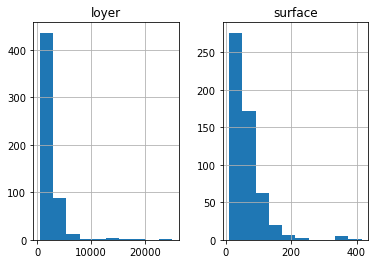

In [211]:
data.hist()

<AxesSubplot:>

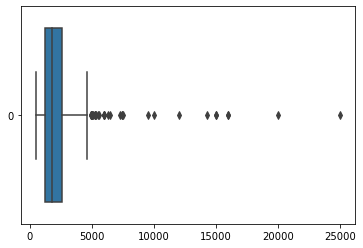

In [23]:
sns.boxplot(data=data.loyer, orient='h')

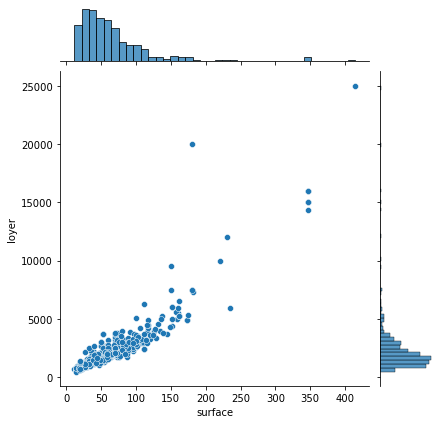

In [212]:
sns.jointplot(data=data, x='surface', y='loyer')

### Linear Regression by calculating the parameters

[[266.45460292]
 [ 30.66119596]]


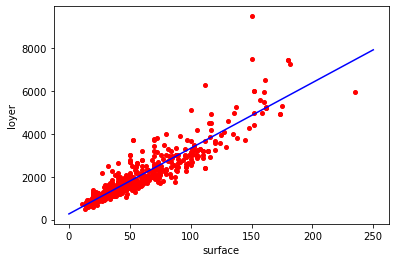

In [213]:
data = data[data['loyer'] < 10000]

X = np.matrix([np.ones(data.shape[0]), data['surface'].values]).T
y = np.matrix(data['loyer']).T

# calcul du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# loyer = theta[0] × surface + theta[1]
print(theta)

def loyer_regL(x):
    return theta.item(0)+theta.item(1)*x

plt.xlabel("surface")
plt.ylabel("loyer")
plt.plot(data['surface'], data['loyer'], 'ro', markersize=4)
plt.plot(np.array([0,250]), 
         loyer_regL(np.array([0,250])), c='blue')
plt.show()

### Data Modeling

In [214]:
X, y = np.array(data["surface"]), np.array(data["loyer"])
X, y = X.reshape(X.shape[0],1), y.reshape(y.shape[0],1)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

regL = linear_model.LinearRegression()
regL.fit(X_train, y_train)

print('\nTrain score:',regL.score(X_train, y_train))
print('Test score:',regL.score(X_test, y_test))


Train score: 0.8331966387333414
Test score: 0.7829707510516877


### Metrics (analyse des erreurs)


MAE: 363.8828416964548
R2 score: 0.7829707510516877


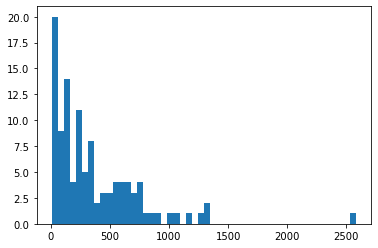

In [215]:
print('\nMAE:', metrics.mean_absolute_error(y_test, regL.predict(X_test)))
print('R2 score:', metrics.r2_score(y_test, regL.predict(X_test)))

err = np.abs(y_test - regL.predict(X_test))
plt.hist(err, bins=50)
plt.show()

### Learning Curve (évolution des erformances en fonction de la quantité de données)

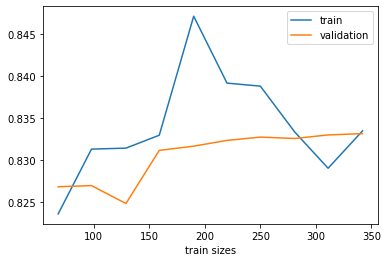

In [216]:
N, train_score, val_score = learning_curve(regL, 
                               X_train, y_train, 
                               train_sizes= np.linspace(0.2, 1, 10),
                               cv=5)

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train sizes')
plt.legend()
plt.show()

## Modèle avec 2 features (surface et localisation)

### Data Exploration

In [241]:
data2 = pd.read_csv('house_data2.csv')

print('\n',data2.shape)

data2.head()


 (827, 3)


,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [219]:
print(data2.info())
print('\n\n', data2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           827 non-null    int64  
 1   surface         822 non-null    float64
 2   arrondissement  822 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 19.5 KB
None


               price     surface  arrondissement
count    827.000000  822.000000      822.000000
mean    2007.342201   58.045925        4.142336
std     1890.894229   44.827522        3.202151
min      390.000000   10.000000        1.000000
25%     1050.000000   28.655000        2.000000
50%     1567.000000   46.100000        3.000000
75%     2346.000000   73.000000        4.000000
max    25000.000000  415.000000       10.000000


In [190]:
data2.isna().sum()

price             0
surface           5
arrondissement    5
dtype: int64

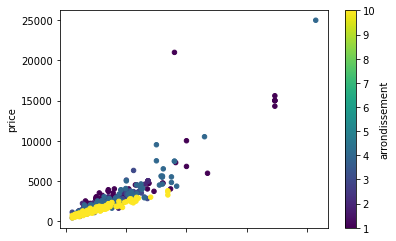

<AxesSubplot:>

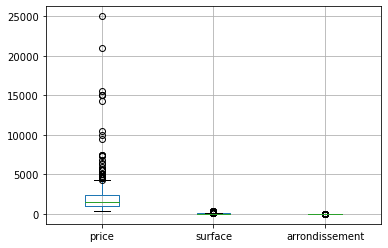

In [242]:
data2 = data2.dropna()
data2.plot.scatter("surface", "price", c="arrondissement", colormap='viridis')
plt.show()

data2.boxplot()

### Data Preprocessing

In [243]:
data2 = data2[data2['price'] < 8000] # on a des outliers sur les loyers>=8000

data2 = data2.reset_index(drop= True)

data2['arrondissement'] = data2['arrondissement'].astype(int)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           812 non-null    int64  
 1   surface         812 non-null    float64
 2   arrondissement  812 non-null    int32  
dtypes: float64(1), int32(1), int64(1)
memory usage: 16.0 KB


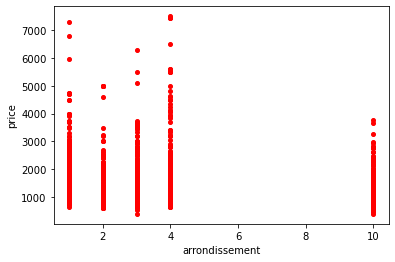

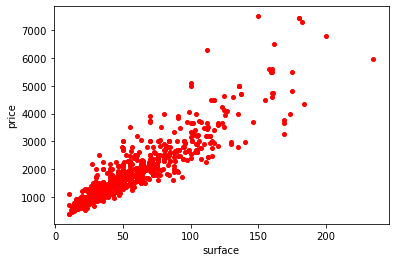

In [244]:
# représentation du loyer en fonction de l'arrondissement
plt.xlabel("arrondissement")
plt.ylabel("price")
plt.plot(data2['arrondissement'], data2['price'], 'ro', markersize=4)
plt.show()

# représentation du loyer en fonction de la surface
plt.xlabel("surface")
plt.ylabel("price")
plt.plot(data2['surface'], data2['price'], 'ro', markersize=4)
plt.show()

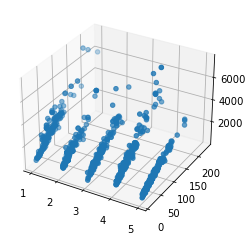

In [249]:
arr = data2['arrondissement'][:]
arr[arr == 10] = 5

ax = plt.axes(projection='3d')
ax.scatter(arr, data2['surface'], data2['price'])
plt.show()

### Data Modeling

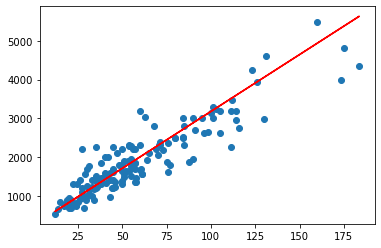


MAE: 281.90365120782695
R2 score: 0.8051776924324593


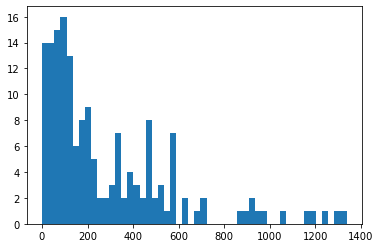

In [253]:
X = data2[["surface", "arrondissement"]]
y = data2["price"]  

# sampling normalement 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

# apprentissage par le modèle et un exemple de prédiction
lr = linear_model.LinearRegression()
lr_baseline = lr.fit(X_train[["surface"]], y_train)

plt.scatter(X_test["surface"], y_test)
plt.plot(X_test["surface"], lr_baseline.predict(X_test[["surface"]]), 'r')
plt.show()

print('\nMAE:', metrics.mean_absolute_error(y_test, lr_baseline.predict(X_test[["surface"]])))
print('R2 score:', metrics.r2_score(y_test, lr_baseline.predict(X_test[["surface"]])))

err = np.abs(y_test - lr_baseline.predict(X_test[["surface"]]))
plt.hist(err, bins=50)
plt.show()

Test score arrondissement 1: 0.6370212280703831
Test score arrondissement 2: 0.8064963981504839
Test score arrondissement 3: 0.789927614932
Test score arrondissement 4: 0.7899334659666608
Test score arrondissement 5: 0.901334953505011


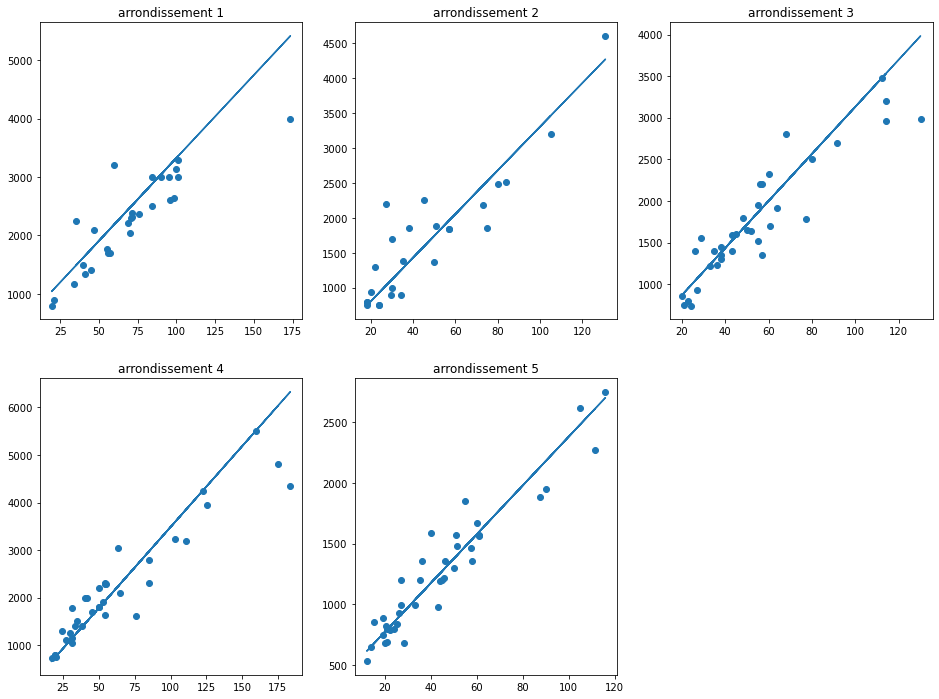

In [256]:
lrs = []

plt.figure(figsize=(16, 12))
for i in np.unique(X_train["arrondissement"]):
    # On génère un jeu de données par arrondissement
    X_train_arr = X_train[X_train['arrondissement']==i]
    y_train_arr = y_train[X_train['arrondissement']==i]

    X_test_arr = X_test[X_test['arrondissement']==i]
    y_test_arr = y_test[X_test['arrondissement']==i]

    lr_arr = linear_model.LinearRegression()
    lr_arr.fit(X_train_arr[["surface"]], y_train_arr)
    lrs.append(lr_arr)
    
    plt.subplot(2, 3, i)
    plt.scatter(X_test_arr[["surface"]], y_test_arr)
    plt.plot(X_test_arr["surface"], lr_arr.predict(X_test_arr[["surface"]]), label='arr {}'.format(i))
    plt.title('arrondissement {}'.format(i))
    
    print('Test score arrondissement {}:'.format(i), lr_arr.score(X_test_arr[["surface"]], y_test_arr))

plt.show()

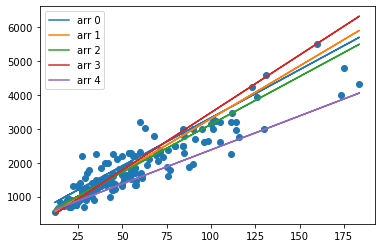

In [261]:
# afficher prédiction finale
plt.scatter(X_test[["surface"]], y_test)
for i in range(len(lrs)):
    plt.plot(X_test["surface"], lrs[i].predict(X_test[["surface"]]), label='arr '+str(i))
    
plt.legend()
plt.show()